In [24]:
import socket
import time
import json
import PIL.Image as Image
import io
import base64
from io import BytesIO
from base64 import decodestring

In [25]:
host, port =  "127.0.0.1" , 8053
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((host,port))

In [26]:
transaction_dict = {
            "MsgType": "Transcation",
            "Version": "0.0.4",
            "InputControlType": "Other",
            "IsActive": "false",
            "LevelReload": "false",
            "ActiveCamera": 0,
            "CaptureScreen": "false",
            "ScreenCaptureType": 0,
        }


In [27]:
def recvall(sock):
    BUFF_SIZE = 4096 # 4 KiB
    data = b''
    while True:
        part = sock.recv(BUFF_SIZE)
        data += part
        if len(part) < BUFF_SIZE:
            # either 0 or end of data
            break
    return data

In [30]:
data = json.dumps(transaction_dict)
try:    
    sock.sendall(data.encode("utf-8"))
    data = recvall(sock)
    print(data)
    # data = eval(data)
    # print(data["ScreenCapture"])
except Exception as e:
    print(">>>>>>>>>>>>",e)
time.sleep(0.01)

b'{"AGL":0.0,"MSL":4.963517,"CurrentRPM":0.0,"MaxRPM":2500.0,"MaxPower":5000.0,"CurrentPower":0.0,"CurrentFuel":0.0,"CurrentSpeed":0.0,"BankAngle":0.978812456,"PitchAngle":18.67046,"ScreenCapture":"","LidarPointCloud":[100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,3935.6062,100000.0,3623.25,3684.84033,100000.0,3369.4873,4749.237,4290.92041,4244.97949,3254.13232,100000.0,100000.0,3421.83252,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,2227.34155,2187.734,2180.25537,2216.625,2264.029,2314.22534,2367.43481,2423.90527,2483.9104,2547.75757,100000.0,100000.0,100000.0,3031.383,3028.86865,100000.0,4004.799,100000.0,100000.0,3675.069,3253.73462,3273.139,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000

In [7]:
for _ in range(100000):
    data = json.dumps(transaction_dict)
    try:    
        sock.sendall(data.encode("utf-8"))
        data = recvall(sock)
        data = eval(data)
        print(len(data["ScreenCapture"]))
    except Exception as e:
        print(">>>>>>>>>>>>",e)
    time.sleep(0.01)

62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
62916
6291

KeyboardInterrupt: 

In [8]:
data

{'AGL': 0.0,
 'MSL': 1256.31873,
 'CurrentRPM': 2500.0,
 'MaxRPM': 2500.0,
 'MaxPower': 5000.0,
 'CurrentPower': 5000.0,
 'CurrentFuel': 0.0,
 'CurrentSpeed': 61.61168,
 'BankAngle': -0.681914151,
 'PitchAngle': 19.0086174,
 'ScreenCapture': 'iVBORw0KGgoAAAANSUhEUgAAAPoAAADICAIAAABOPGvMAAAgAElEQVR4AdS9B4BcV3U3PjM727tWK626ZFuy1bssN2xjYjCBgI1pBieQhIR8Hx8k+RxKQgIhlECoqYSEQMBgY2wMuFAMAVxlWd2yLUtW73X77uzM7Mz3O+fec9t7b3ZXNvnn/7R6995zfqfc+8697777yqR//y+/kVJbuawzTiKkckpyDjM2y1oqgT0eFTxCpOxw47OBFw5IccZw3cMnFwIrUkxLxkl9ml9yYGHWB6rShP0JlaJMOjw9jEmnfHtRwTi+0CSNSgWUBKCQJQ2kzq8oyjiVQqAqq+jUHmkHIqEvpJjWkSYMwom1iJhrTOPKHo8KmqD1lVEW1STucB1JH+Mez7QrrBSIXMiBHbLmbHGFiJTFe3BLjs0JVlIXFEdjvsfQhRh/KpJIzNPjWk7gCV7SQCQoCkpSlx1Hc/njzjvR+SJ0ZlVbsAbdapQ4yq1DxLAtK0bDnmAR0meUBo0TMaOWYo5NCswcHVdTRMwSHGFSwQwrGnjsMAgqWjyydo1pQX/QrCBhLaIqjhfQkothu2sfXIEYOwmkmEq5JEfKybqmgjyjfKhfCvDjKHryuuDRxqFjDAipk/+prDniROTWcMy5raP4DtM1Q0ANtgj/2Hm6nJ5AMWdlSCkrw85SHU1WDcMAtzASVpumEcRne6cFq4tAtuTocKRDfqhaScXtrRKbM7gYkuEp5x1E1AfBMsdnO3KCi

In [9]:
im = Image.open(BytesIO(base64.b64decode(data["ScreenCapture"])))


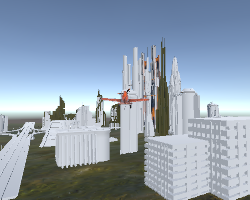

In [10]:
im

In [ ]:
sock.close()